The dataset used is about the crime incident reports provided by Boston Police Department (BPD). It conatins 17 attriutes, namely, INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, SHOOTING, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, UCR_PART, STREET, Lat, Long and Location. This data ranges from 2015 till present. Fromthis dataset, we get information of type of offense(shooting or other criminal incident), the month, year, day and hour at which the incident occurred and the location(street, district) of the incident.

In this analysis, I would answer questions, What is the trend of shooting and other criminal incidents over the years? On which day of the week there are high number shooting and other criminal incidents recorded? What is the trend of shooting and other offences over the hour of the day? What type of criminal incidents are the highest recorded? On which streets are the offenses recorded? What are the districts with most number of shooting and other incidents recorded.

# Data extraction

Importing files packages and dataset.

The dataset is Crime Incident Reports(August 2015 - To Date)(Source: New System) in Boston, which is available on  http://data.boston.gov

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve 
from Rakshitha_Chandrashekaraiah_Capstone_Project import output_District, output_Graph, read_CSV, fill_Nan, calc_prevalence, calc_specificity, print_report

In [52]:
#reading the Boston Crime Incident Dataset
crime_data = read_CSV("https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpv38qrpgp.csv")
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192043446,3115,Investigate Person,INVESTIGATE PERSON,C11,379,NaN,2019-06-08 21:49:00,2019,6,Saturday,21,Part Three,MINOT ST,42.283659,-71.055102,"(42.28365903, -71.05510166)"
1,I192043444,2007,Restraining Order Violations,VIOL. OF RESTRAINING ORDER W NO ARREST,C11,342,NaN,2019-06-08 21:58:17,2019,6,Saturday,21,Part Two,TOPLIFF ST,42.304435,-71.068629,"(42.30443502, -71.06862907)"
2,I192043439,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,C11,342,NaN,2019-06-08 21:41:00,2019,6,Saturday,21,Part Three,LEVANT ST,42.303419,-71.069557,"(42.30341896, -71.06955667)"
3,I192043438,3114,Investigate Property,INVESTIGATE PROPERTY,E13,649,NaN,2019-06-08 20:24:00,2019,6,Saturday,20,Part Three,BALLARD ST,42.307567,-71.117694,"(42.30756728, -71.11769388)"
4,I192043433,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,C11,355,NaN,2019-06-08 22:05:00,2019,6,Saturday,22,Part Three,PARK ST,42.298784,-71.060120,"(42.29878438, -71.06011998)"


# Data Cleaning

In [53]:
#filling Nan 
crime_data = fill_Nan(crime_data)

In [54]:
# creating a subset of the dataframe
cols_used = ['OFFENSE_CODE_GROUP','DISTRICT','SHOOTING','YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'STREET', 'Lat','Long']
crime = crime_data[cols_used]

In [55]:
#renamign the columns
crime.columns = ['Offense','District','Shooting','Year','Month','Day_of_the_week','Hour','Street','Latitude','Longitude']
crime.head()

,Offense,District,Shooting,Year,Month,Day_of_the_week,Hour,Street,Latitude,Longitude
0,Investigate Person,C11,N,2019,6,Saturday,21,MINOT ST,42.283659,-71.055102
1,Restraining Order Violations,C11,N,2019,6,Saturday,21,TOPLIFF ST,42.304435,-71.068629
2,Medical Assistance,C11,N,2019,6,Saturday,21,LEVANT ST,42.303419,-71.069557
3,Investigate Property,E13,N,2019,6,Saturday,20,BALLARD ST,42.307567,-71.117694
4,Motor Vehicle Accident Response,C11,N,2019,6,Saturday,22,PARK ST,42.298784,-71.060120


In [56]:
#replacing Disrtict codes with Names
crime = output_District(crime)
crime.head()

C:\Users\raksh\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Offense,District,Shooting,Year,Month,Day_of_the_week,Hour,Street,Latitude,Longitude
0,Investigate Person,Dorchester,N,2019,6,Saturday,21,MINOT ST,42.283659,-71.055102
1,Restraining Order Violations,Dorchester,N,2019,6,Saturday,21,TOPLIFF ST,42.304435,-71.068629
2,Medical Assistance,Dorchester,N,2019,6,Saturday,21,LEVANT ST,42.303419,-71.069557
3,Investigate Property,Jamaica Plain,N,2019,6,Saturday,20,BALLARD ST,42.307567,-71.117694
4,Motor Vehicle Accident Response,Dorchester,N,2019,6,Saturday,22,PARK ST,42.298784,-71.060120


# Data Visualization

Trend of shooting and other criminal incidents over the years?

C:\Users\raksh\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


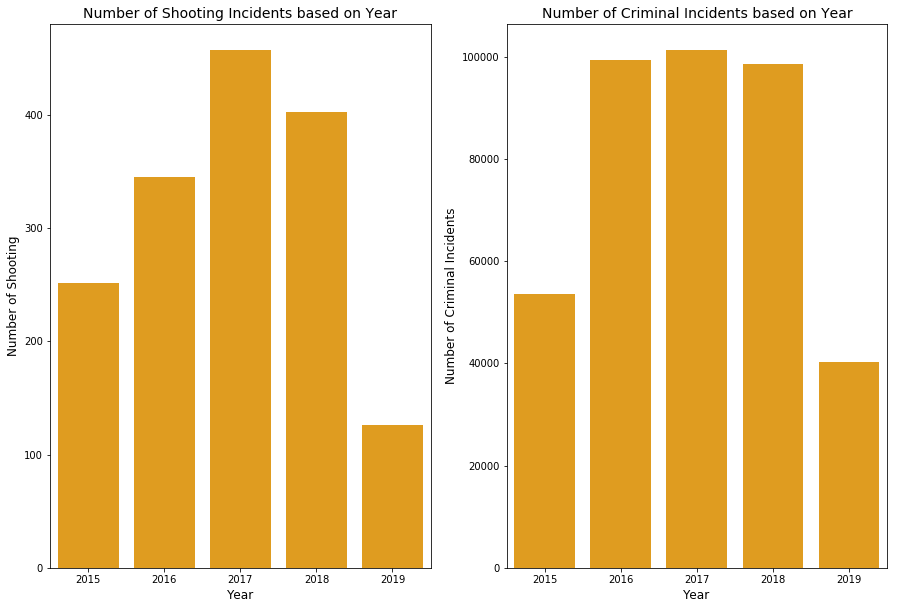

In [57]:
graph = output_Graph(crime,'Year')
graph.show()

Trend of shooting and other criminal incidents based on Month

C:\Users\raksh\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


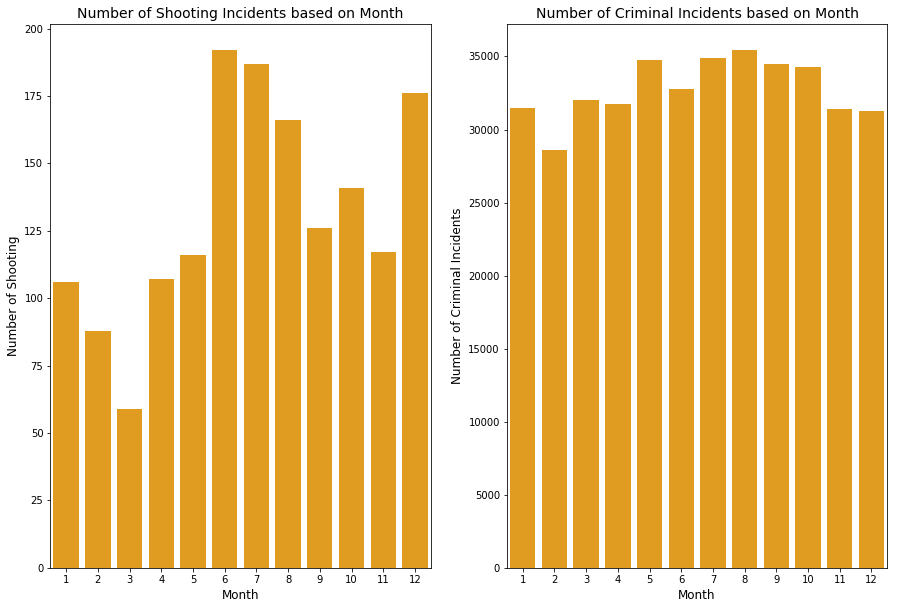

In [58]:
graph = output_Graph(crime,'Month')
graph.show()

Trend of shooting and other criminal incidents based on Hour

C:\Users\raksh\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


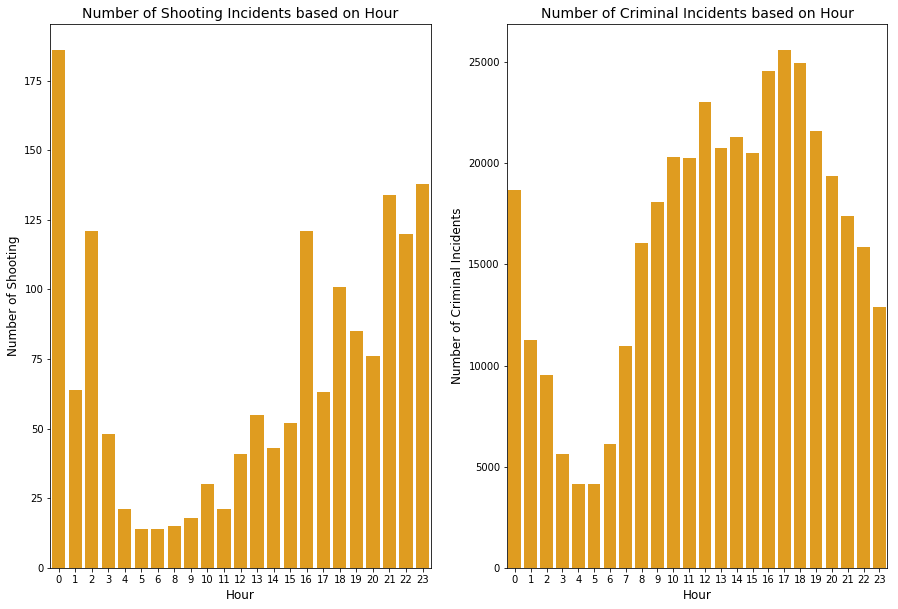

In [59]:
graph = output_Graph(crime,'Hour')
graph.show()

Trend of shooting and other criminal incidents based on Day of the week

C:\Users\raksh\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


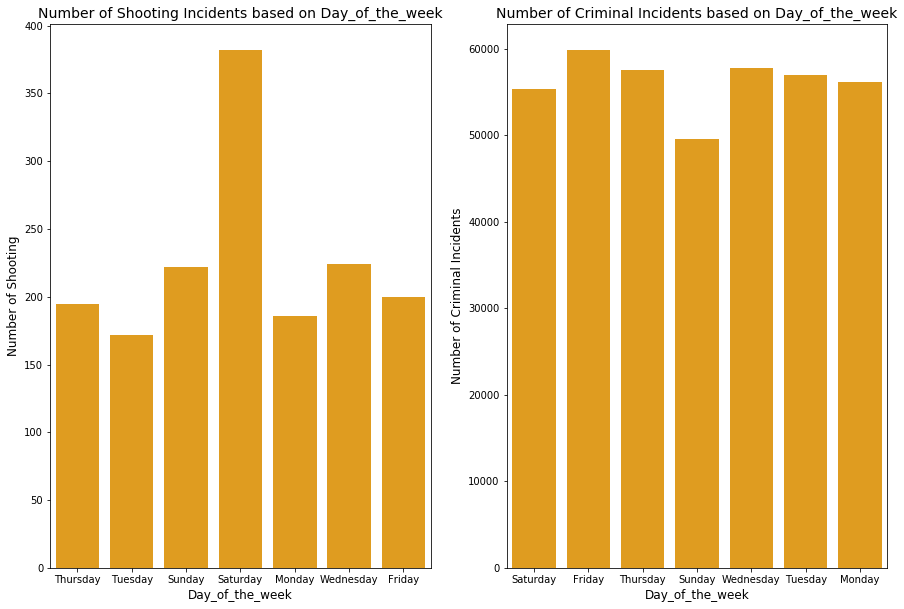

In [60]:
graph = output_Graph(crime,'Day_of_the_week')
graph.show()

What type of criminal incidents are the highest recorded?

Text(0.5, 1.0, 'Top 10 Incidents Recorded')

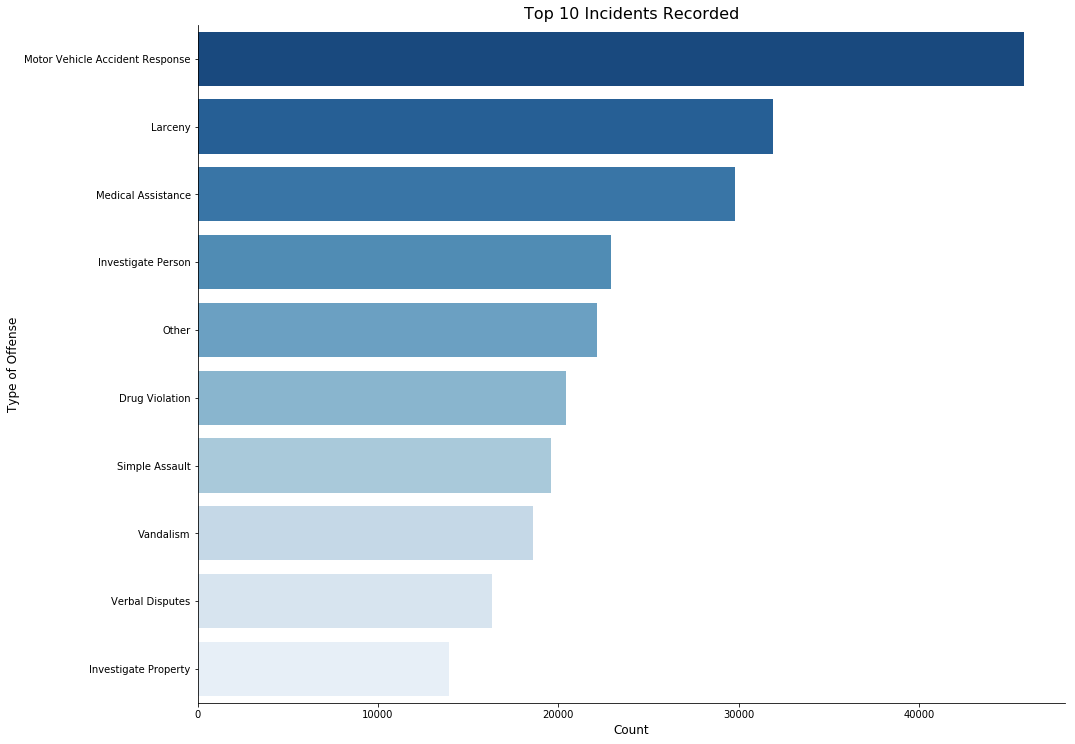

In [61]:
sns.catplot(y='Offense',
           kind='count',
            height=10, 
            aspect=1.5,
            palette='Blues_r',
            order=crime.Offense.value_counts().head(10).index,
           data=crime)

plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of Offense', fontsize=12)
plt.title('Top 10 Incidents Recorded', fontsize=16)

Criminal Incidents based on District

Text(0.5, 1.0, 'Criminal Incidents based on Distict')

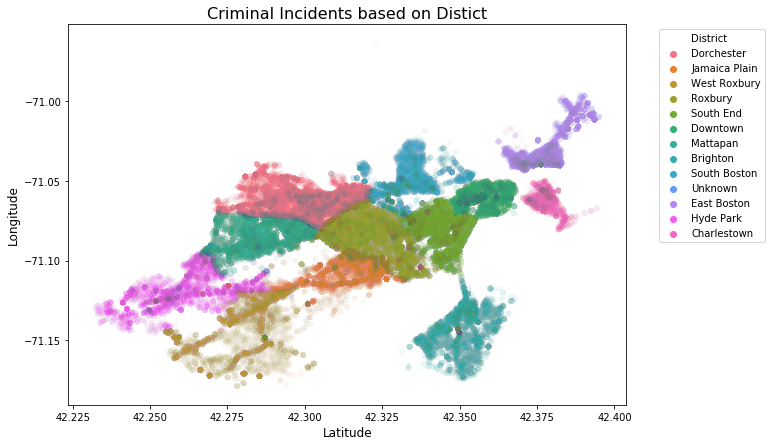

In [62]:
fig = plt.figure(figsize=(10,7))
sns.scatterplot(x='Latitude',
               y='Longitude',
                hue='District',
                alpha=0.01,
               data=crime)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Latitude',fontsize = 12)
plt.ylabel('Longitude',fontsize = 12)
plt.title('Criminal Incidents based on Distict',fontsize = 16)

Number of Shootings and other ciminal incidents based on District

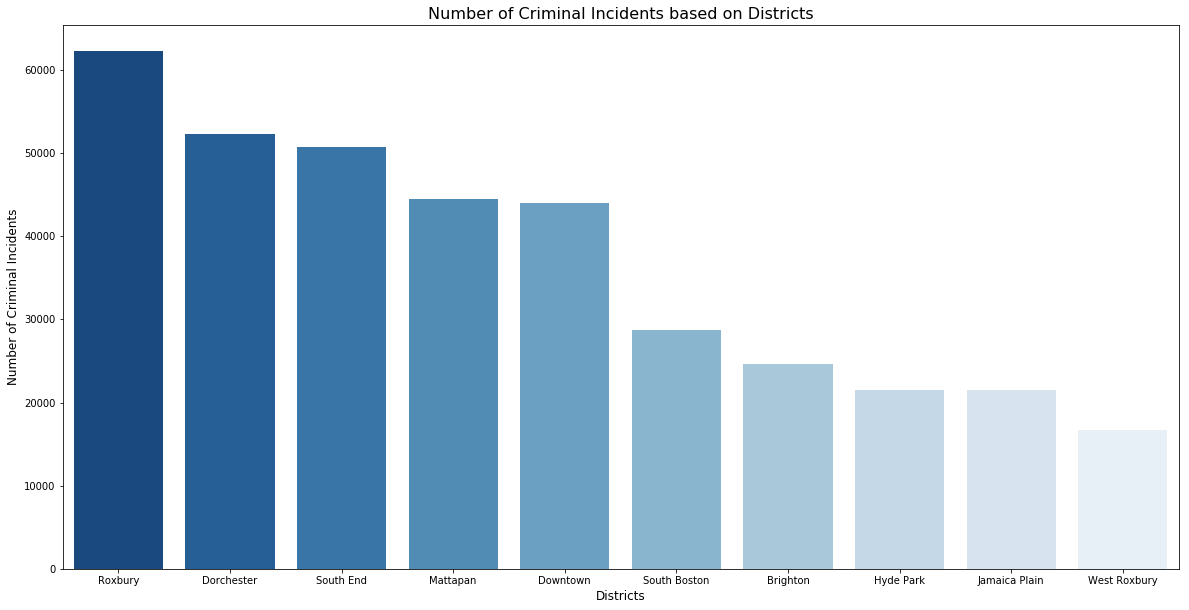

In [63]:
districts = crime.groupby([crime['District']])['Year'].aggregate(np.size).reset_index().sort_values('Year',ascending = False).head(10)
fig = plt.figure(figsize=(20,10))
sns.barplot(x='District',
            y='Year', 
            palette='Blues_r',
            data = districts)
plt.xlabel('Districts', fontsize = 12)
plt.ylabel('Number of Criminal Incidents', fontsize = 12)
plt.title('Number of Criminal Incidents based on Districts', fontsize = 16)
plt.show()

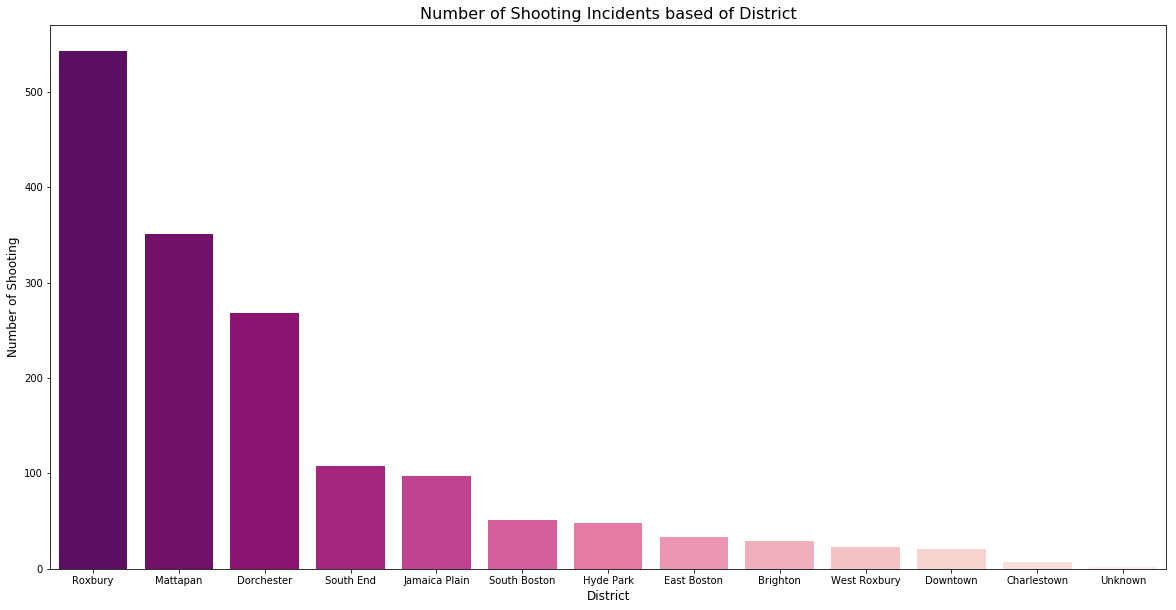

In [64]:
shooting_district = crime[crime['Shooting'] == 'Y'].groupby('District').agg('Shooting').count().reset_index().sort_values('Shooting', ascending=False)
fig = plt.figure(figsize=(20,10))
sns.barplot(x=shooting_district.District, 
            y=shooting_district.Shooting, 
            palette='RdPu_r',
            data=shooting_district)
plt.xlabel('District', fontsize = 12)
plt.ylabel('Number of Shooting', fontsize = 12)
plt.title('Number of Shooting Incidents based of District', fontsize = 16)
plt.show()

Number of Shootings and other ciminal incidents based on Street

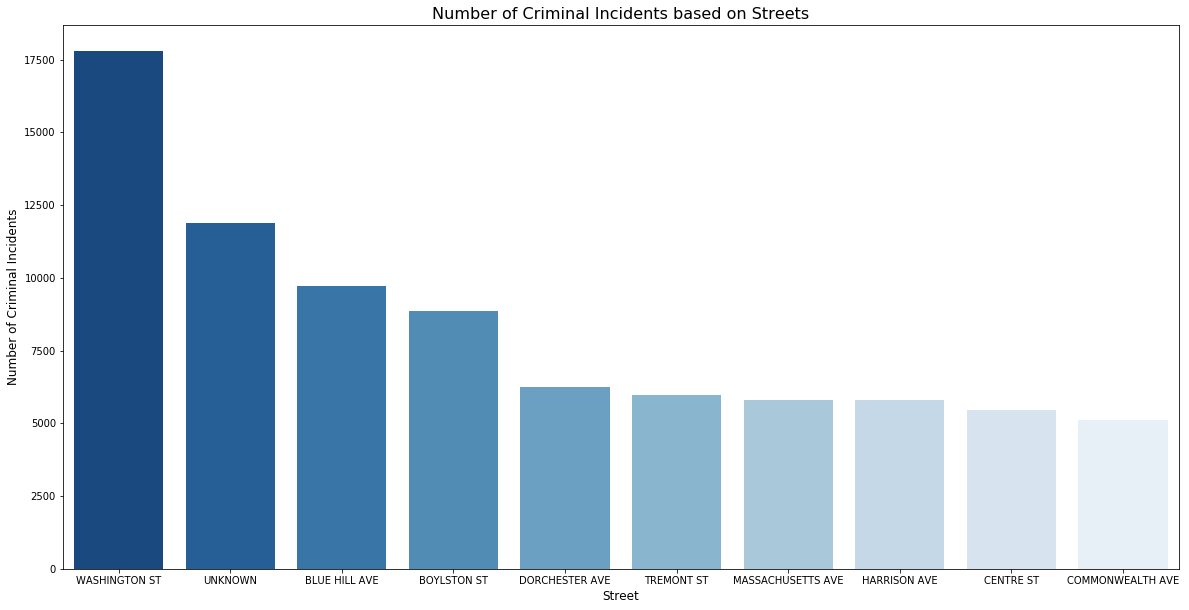

In [65]:
streets = crime.groupby([crime['Street']])['Year'].aggregate(np.size).reset_index().sort_values('Year',ascending = False).head(10)
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Street',
            y='Year', 
            palette='Blues_r',
            data = streets)
plt.xlabel('Street', fontsize = 12)
plt.ylabel('Number of Criminal Incidents', fontsize = 12)
plt.title('Number of Criminal Incidents based on Streets', fontsize = 16)
plt.show()

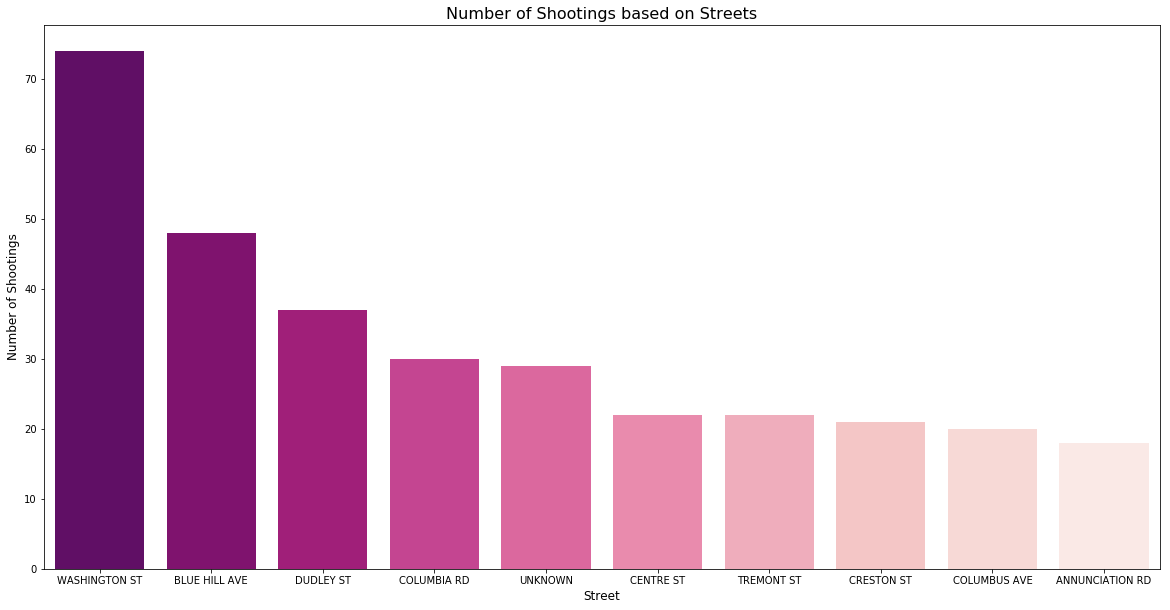

In [66]:
shooting_street = crime[crime['Shooting'] == "Y"].groupby('Street').agg('Shooting').count().reset_index().sort_values('Shooting', ascending=False).head(10)
fig = plt.figure(figsize=(20,10))
sns.barplot(x=shooting_street.Street, 
            y=shooting_street.Shooting, 
            palette='RdPu_r',
            data=shooting_street)
plt.xlabel('Street', fontsize = 12)
plt.ylabel('Number of Shootings', fontsize = 12)
plt.title('Number of Shootings based on Streets', fontsize = 16)
plt.show()

# Descriptive Analytics

In [67]:
#the attributes and the number of unique values
for c in list(crime.columns):
    
    # get a list of unique values
    n = crime[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

Offense: 67 unique values
District
['Dorchester' 'Jamaica Plain' 'West Roxbury' 'Roxbury' 'South End'
 'Downtown' 'Mattapan' 'Brighton' 'South Boston' 'Unknown' 'East Boston'
 'Hyde Park' 'Charlestown']
Shooting
['N' 'Y']
Year
[2019 2018 2016 2017 2015]
Month
[ 6  5  1  4 12  9  3  2  8  7 11 10]
Day_of_the_week
['Saturday' 'Friday' 'Thursday' 'Sunday' 'Wednesday' 'Tuesday' 'Monday']
Hour
[21 20 22 19 17 12 11 14 18 16  0  2 15  8 13  9 10  7  6  5  4  3 23  1]
Street: 4809 unique values
Latitude: 18705 unique values
Longitude: 18707 unique values


From the above output, we can see that there are 67 types of criminal incidents and Shooting incidents recorded. The data is collected from 13 districts covering 4810 streets over the year 2015 to present. 

* The highest number of shootings and the number of criminal incidents recorded was highest in 2017

* Most number of shootings occured in June and the number of criminal incidents recorded was highest in August

* During 00HRS, the highest number of shooting occured and during 17HRS, number of criminal incidents recorded was the highest

- Most of the shootings occured on Saturday and the most of the criminal incidents were recorded on Friday

* The highest number of Criminal incidents recorded is for Motor Vehical Accidents followed by Larceny

In [68]:
crime.Offense.value_counts().head(10)

Motor Vehicle Accident Response    45826
Larceny                            31924
Medical Assistance                 29793
Investigate Person                 22937
Other                              22134
Drug Violation                     20447
Simple Assault                     19600
Vandalism                          18593
Verbal Disputes                    16299
Investigate Property               13924
Name: Offense, dtype: int64

* Roxbury has most number of criminal incidents recorded

* Roxbury followed by Dorchester has the most number of criminal incidents recorded

In [69]:
districts.columns = ['Distict','Number of Criminal Incidents']
districts

,Distict,Number of Criminal Incidents
8,Roxbury,62296
2,Dorchester,52377
10,South End,50805
7,Mattapan,44441
3,Downtown,44021
9,South Boston,28774
0,Brighton,24691
5,Hyde Park,21567
6,Jamaica Plain,21485
12,West Roxbury,16656


* Roxbury followed by Mattapan has the most number of shooting incidents recorded

In [70]:
shooting_district.columns = ['Distict','Number of Shootings']
shooting_district

,Distict,Number of Shootings
8,Roxbury,543
7,Mattapan,351
2,Dorchester,268
10,South End,108
6,Jamaica Plain,97
9,South Boston,51
5,Hyde Park,48
4,East Boston,33
0,Brighton,29
12,West Roxbury,23


* Washington street highest number of criminal incidents recorded

In [71]:
streets.columns = ['Street', 'Number of Criminal Indicents']
streets

,Street,Number of Criminal Indicents
4534,WASHINGTON ST,17792
4368,UNKNOWN,11878
508,BLUE HILL AVE,9705
575,BOYLSTON ST,8852
1346,DORCHESTER AVE,6241
4327,TREMONT ST,5965
2837,MASSACHUSETTS AVE,5813
2074,HARRISON AVE,5808
842,CENTRE ST,5442
1045,COMMONWEALTH AVE,5120


* Washington street followed by Blue Hill Avenue has the highest number of shooting incidents recorded

In [72]:
shooting_street.columns = ['Street', 'Number of Shootings']
shooting_street

,Street,Number of Shootings
355,WASHINGTON ST,74
34,BLUE HILL AVE,48
106,DUDLEY ST,37
73,COLUMBIA RD,30
333,UNKNOWN,29
63,CENTRE ST,22
331,TREMONT ST,22
80,CRESTON ST,21
74,COLUMBUS AVE,20
14,ANNUNCIATION RD,18


# Predective Analytics

Classification Model : The objective is to Predecit "Motor Vehicle Accident" incidents based on Year, Month, Hour, Day of the week, Street and District

In [73]:
crime['OUTPUT_LABEL'] = np.where(crime['Offense'] == 'Motor Vehicle Accident Response', 1, 0)

C:\Users\raksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
print('The prevalence of the positive class: %.3f'%calc_prevalence(crime['OUTPUT_LABEL'].values))

The prevalence of the positive class: 0.117


In [75]:
#numerical categorical columns
cols_num = ['Year', 'Month','Hour']

In [76]:
#convertion of columns into String
crime[cols_num] = crime[cols_num].astype('str')

C:\Users\raksh\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


On-hot encoding is used to convert categorical data into numerical or binary variable which can be inputted into the machine learning algorithms for prediction. In this process, if there are N categories, N columns are generated, for each column the category which the variable belongs to will be marked 1 and the rest are marked 0, to make sure there is no duplicate data created for all zeroes, the first column is discarded.

In [77]:
#one-hot encoding
pd.get_dummies(crime[cols_num],drop_first = True).head()

,Year_2016,Year_2017,Year_2018,Year_2019,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [78]:
#categorical columns
cols_cat = ['District', 'Day_of_the_week', 'Street']

In [79]:
#one-hot encoding
pd.get_dummies(crime[cols_cat],drop_first = True).head()

,District_Charlestown,District_Dorchester,District_Downtown,District_East Boston,District_Hyde Park,District_Jamaica Plain,District_Mattapan,District_Roxbury,District_South Boston,District_South End,...,Street_YAWKEY,Street_YAWKEY WAY,Street_YORK ST,Street_YORKTOWN ST,Street_YUILL CIR,Street_YULETIDE RD,Street_ZAMORA CT,Street_ZAMORA ST,Street_ZEIGLER ST,Street_ZELLER ST
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#creating a new dataframe of categorical columns used for modeling
df_cat = pd.get_dummies(crime[cols_cat + cols_num],drop_first = True)

In [81]:
#creating a new dataframe of categorical columns used for modeling and the original dataset
df = pd.concat([crime,df_cat], axis = 1)

In [82]:
#defining the columns used for modeling
cols_all_cat = list(df_cat.columns)

In [83]:
#creating a new dataframe of categorical columns used for modeling and the output_label
df_data = df[cols_all_cat + ['OUTPUT_LABEL']]

In [84]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [85]:
#Using 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [86]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [87]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [88]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 64298):0.500


In [89]:
#define variables used for further calculations
X_train = df_train[cols_all_cat].values
X_train_all = df_train_all[cols_all_cat].values
X_valid = df_valid[cols_all_cat].values
X_test = df_test[cols_all_cat].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

In [90]:
#defining threshold
thresh = 0.5

Logistic Regression is a predictive algorithm in which, dependent variable and independent variables are used to form an equation to predict the dependent variable. In this algorithm, dependent variable is always binary, i.e., 0 or 1. So, in logistic regression, a binary dependent variable is described based on independent variable. It uses independent variables to predict dependent variable through linear equations. This value lies between negative to positive infinity. The output of Linear equation is converted into 0(False) or 1(True) using Sigmoid Function

In [91]:
# logistic regression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

C:\Users\raksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
#Performance Measures
y_train_preds = lr.predict_proba(X_train)[:,1]
y_valid_preds = lr.predict_proba(X_valid)[:,1]
y_test_preds = lr.predict_proba(X_test)[:,1]

print('Logistic Regression\n')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
lr_test_auc, lr_test_accuracy, lr_test_recall, \
    lr_test_precision, lr_test_specificity = print_report(y_test,y_test_preds, thresh)


Logistic Regression

Training:
AUC:0.716
accuracy:0.655
recall:0.667
precision:0.651
specificity:0.642
prevalence:0.500
 
Validation:
AUC:0.670
accuracy:0.614
recall:0.629
precision:0.174
specificity:0.613
prevalence:0.115
 
Test:
AUC:0.679
accuracy:0.615
recall:0.642
precision:0.179
specificity:0.611
prevalence:0.117
 


AUC : Area Under The Curve. It is a performance measurement for classification problem at various thresholds settings. Higher the AUC, better the model is at predicting.
Accuray : The fraction which is predicted correctly.
Recall : The fraction of correctly predicted positives.
Precison : The fraction of correctly predicted positives out of the actual postives.
Specificity : The fraction of correctly predicted negatives.
Prevalence : The fraction of positives in the sample. 

Considering AUC, the training has 71.6% under the curve and the test data had 67.9%. The model can be optimized to increase the area under the curve being close to 100%.

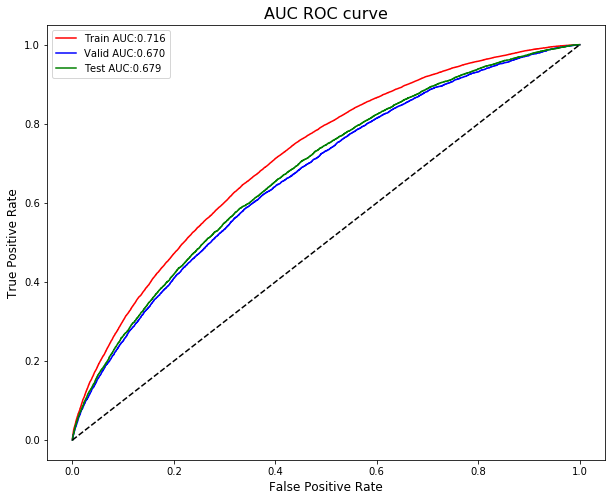

In [93]:
#ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = lr_train_auc

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = lr_valid_auc

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = lr_test_auc

fig = plt.figure(figsize=(10,8))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('AUC ROC curve',fontsize = 16)
plt.legend()
plt.show()

We can see from AUC ROC curve of based on the model created for Training, Validation and Test data. 

We can say that 0.716, i.e., 71.6% of Motor Vehicle Accident can be predicted with a threshold of 0.5.